# Credit Risk Analysis Prediction

Let's work with the 'Credit Risk Dataset' from Kaggle. In this project, we will analyze and preprocess the data from numerous individuals and construct machine learning models to determine whether loans will be granted or not. We will test the 'Neural Network', 'Gradient Boosting', 'Random Forest', 'SVM', 'KNN', and 'Logistic Regression' models.

Dataset Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Summary

### Chapter 1: Exploratory Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Data Types
- 1.4: Final Data Analysis
- 1.5: Plotting Graphs

### Chapter 2: Data Wrangling
- 2.1: Missing Values
- 2.2: Handling Outliers
- 2.3: Handling Incorrect Data Types
- 2.4: One Hot Encoding
- 2.5: Standardization

### Chapter 3: Building and Testing Machine Learning Models
- 3.1: Splitting Data into Training and Testing Sets
- 3.2: Logistic Regression
- 3.3: Random Forest
- 3.4: Gradient Boosting
- 3.5: Support Vector Machine (SVM)
- 3.6: K-Nearest Neighbors (KNN)
- 3.7: Neural Network

### Chapter 4: Conclusion

# Chapter 1 - Exploratory and Statistical Analysis

In this section, we take a close look at our data to understand what it can tell us. We start by summarizing the main features of the data and then use graphs and charts to visualize it in a way that's easy to understand. By doing this, we hope to find any interesting patterns or trends that can guide us in our further analysis. This step is crucial for getting to know our data better before we dive into more advanced techniques.

In [226]:
# Let's start by importing the initial libraries needed to carry out our project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

- Feature Name:	                    Description
- person_age:	                    Age
- person_income:	                Annual Income
- person_home_ownership:	        Home ownership
- person_emp_length:	            Employment length (in years)
- loan_intent:	                    Loan intent
- loan_grade:	                    Loan grade
- loan_amnt:	                    Loan amount
- loan_int_rate:	                Interest rate
- loan_status:	                    Loan status (0 is non default 1 is default)
- loan_percent_income:	            Percent income
- cb_person_default_on_file:	    Historical default
- cb_preson_cred_hist_length:	    Credit history length

"loan_status" is our target class.

loan_status 0 = loan denied.

loan_status 1 = loan approved.

### 1.1: Importing Data and First Look

Let's start by importing our data from a '.csv' file using the Pandas library, so we can view our data and perform an initial analysis on it.

In [227]:
# We will start by using the 'Pandas' library to read the 'credit_risk_dataset.csv' file.
credit_df = pd.read_csv("credit_risk_dataset.csv", index_col=0)

# Let's view the first 5 and last 5 rows of the dataframe to check the data.
credit_df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [228]:
# Here, we'll use the 'describe()' method to check some descriptive statistics about the numeric columns of the dataframe 'credit_df'.
credit_df.describe() 

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [229]:
credit_df['loan_status'].unique()

array([1, 0], dtype=int64)

In [230]:
# Check the quantity of 0s and 1s in the 'loan_status' column
loan_status_counts = credit_df['loan_status'].value_counts()

# Display the results
print("Quantity of 0s and 1s in the 'loan_status' class:")
print(loan_status_counts)

Quantity of 0s and 1s in the 'loan_status' class:
loan_status
0    25473
1     7108
Name: count, dtype: int64


### 1.2: Checking Null Values

We will use the 'isnull' and 'sum' methods to sum up the null values in each column.

In [231]:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

"person_emp_length" and "loan_int_rate" are the columns that has null values in our dataset. 

### 1.3: Checking Data Types

 We'll use the 'dtypes' attribute of the dataframe 'credit_df' to check the data types of each column.

In [232]:
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Check if the unique datas are correct in the 'cb_person_default_on_file' column.

In [233]:
credit_df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

The 'cb_person_default_on_file' column has only two types of entries: 'Y' for 'Yes' and 'N' for 'No'. 

Let's transform it further into the 'Boolean' format to better suit machine learning models.

### 1.4: Final Data Analysis.

In [234]:
# Verificar os valores únicos em person_home_ownership.
credit_df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [235]:
# Checking the unique values in loan_intent.
credit_df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [236]:
# Checking the unique values in loan_grade.
credit_df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

### 1.5: Plotting Graphs

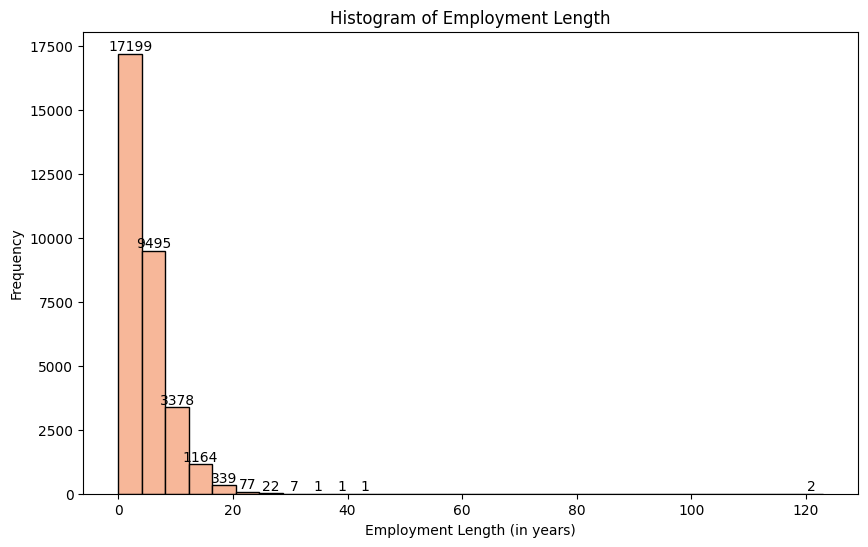

In [237]:
# Define a color palette using the seaborn color_palette() function
colors = sns.color_palette("RdBu", n_colors=2)

# Creating the histogram
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(credit_df['person_emp_length'].dropna(), bins=30, edgecolor='black', color=colors[0])  # Using the first color from the palette

# Adding specific numbers over the bars
for count, value in zip(n, bins[:-1]):
    if count > 0:
        plt.text(value + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Setting the title and axis labels
plt.title('Histogram of Employment Length')
plt.xlabel('Employment Length (in years)')
plt.ylabel('Frequency')

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('employment_plot.png', bbox_inches='tight')

# Displaying the histogram
plt.show()

An outlier was detected above 120 and we will handle it in the next step.

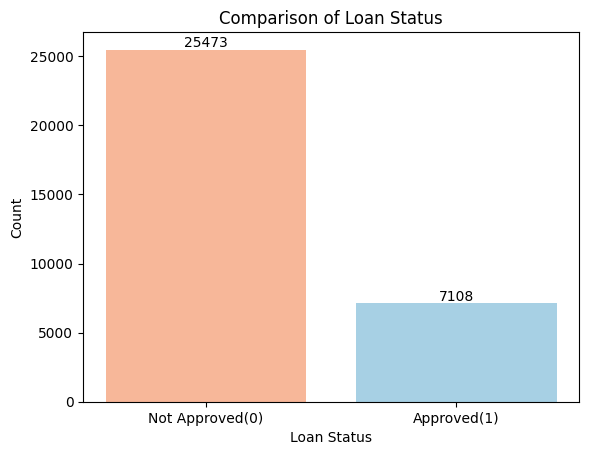

In [238]:
# Count of entries with value 0 and 1
count_0 = credit_df['loan_status'].value_counts()[0]
count_1 = credit_df['loan_status'].value_counts()[1]

# # Defining colors
# colors = ['tomato', 'steelblue']

# Creating the bar plot with colors
plt.bar(['Not Approved(0)', 'Approved(1)'], [count_0, count_1], color=colors)

# Adding labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Comparison of Loan Status')

# Adding counts above the bars
for i, count in enumerate([count_0, count_1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('loan_status_plot.png', bbox_inches='tight')

# Displaying the plot
plt.show()

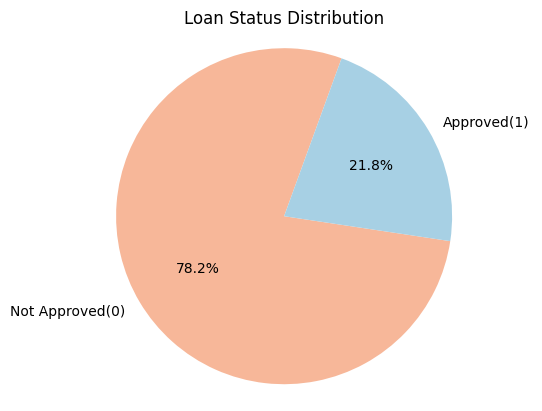

In [239]:
# Calculating the percentage of entries with value 0 and 1
percentage_0 = (credit_df['loan_status'].value_counts()[0] / len(credit_df)) * 100
percentage_1 = (credit_df['loan_status'].value_counts()[1] / len(credit_df)) * 100

# Creating the pie chart
labels = ['Not Approved(0)', 'Approved(1)']
sizes = [percentage_0, percentage_1]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70, colors=colors)

# Adding a title
plt.title('Loan Status Distribution')

# Displaying the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('loan_distribution_plot.png', bbox_inches='tight')

plt.show()

# Chapter 2: Data Wrangling

In this section, we roll up our sleeves and prepare our data for analysis. We clean, transform, and reshape the raw data into a format that's suitable for our needs. This involves handling missing values, removing duplicates, and standardizing formats. Our goal in this phase is to ensure that our data is reliable and consistent, setting a solid foundation for our future ML models. By processing the data effectively, we can maximize the accuracy and relevance of our insights, empowering us to make informed decisions based on trustworthy information.

### 2.1: Missing Values 

First of all, we'll handle the null values that we've found in our dataframe on the previous step. 

In [240]:
# Create a function to replace null values with the mean value of a specific column.
def replace_nan_with_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=True)

In [241]:
# Using the function to replace null values in 'person_emp_length'.
replace_nan_with_median(credit_df, 'person_emp_length')
 
# Check if the replacements were successful:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [242]:
# Using the function to replace blank values in 'loan_int_rate'.
replace_nan_with_median(credit_df, 'loan_int_rate')

# Check if there are still blank values:
credit_df.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2.2: Handling Outliers

Since it's impossible for a human to be employed for over 120 years, we've decided to remove the outlier that we've found in the previous step.

In [243]:
def remove_values_above_max(dataframe, column_name, max_value):
    dataframe.drop(dataframe[dataframe[column_name] > max_value].index, inplace=True)

In [244]:
# Using the function to replace values greater than 120 in 'person_emp_length'.
remove_values_above_max(credit_df, 'person_emp_length', 120)

# Check if the values were removed correctly
# Here we'll verify the maximum value of this column.
credit_df['person_emp_length'].max()

41.0

### 2.3: Handling Incorrect Data Types

Now we will handle the incorrect data types in our dataframe.

In [245]:
def transform_values(dataframe, column_name, value_mapping):
    dataframe[column_name] = dataframe[column_name].map(value_mapping)

In [246]:
# Using the function to transform 'Y' into True and 'N' into False in 'cb_person_default_on_file'.
transform_values(credit_df, 'cb_person_default_on_file', {'Y': True, 'N': False})

# Checking if the transformation was applied correctly.
credit_df['cb_person_default_on_file'].unique()

array([False,  True])

The code evaluates whether each value of the column is equal to 'Y'. The result will be True or False.

In [247]:
# Once again, let's check how the first few rows of the dataframe look after the changes.
credit_df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,False,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,False,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,True,4
26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,False,3
24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,False,4


In [248]:
# We will check if the data type in 'cb_person_default_on_file' has changed to boolean.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file        bool
cb_person_cred_hist_length      int64
dtype: object

### 2.4: One Hot Encoding 

Applying One Hot Encoding to columns of type 'object'.

In [249]:
# Selecting categorical columns to apply one-hot encoding.
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Apply one-hot encoding
credit_df = pd.get_dummies(credit_df, columns=columns_to_encode)
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [250]:
# Display the first few rows of the DataFrame with the encoded columns.
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [251]:
# We'll check how the columns look after applying One Hot Encoding.
# Notice how the number of columns has changed.
credit_df.columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [252]:
# Let's check the data types of the columns.
# Notice that all the new columns are booleans.
credit_df.dtypes

person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file            bool
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE       bool
person_home_ownership_OTHER          bool
person_home_ownership_OWN            bool
person_home_ownership_RENT           bool
loan_intent_DEBTCONSOLIDATION        bool
loan_intent_EDUCATION                bool
loan_intent_HOMEIMPROVEMENT          bool
loan_intent_MEDICAL                  bool
loan_intent_PERSONAL                 bool
loan_intent_VENTURE                  bool
loan_grade_A                         bool
loan_grade_B                         bool
loan_grade_C                         bool
loan_grade_D                         bool
loan_grade_E                         bool
loan_grade_F                      

### 2.5: Standardization

We will now apply a standardization process to the data to better work with it in Machine Learning models.

- Standardization refers to the process of adjusting the scale of the data so that they have a mean of zero and a standard deviation of 1. The StandardScaler performs this normalization by subtracting the mean of each feature and then dividing by the standard deviation. This helps ensure that the data have a more uniform distribution and can improve the performance of many machine learning algorithms.

In [253]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for standardization.
numeric_columns = credit_df.select_dtypes(include=['float64', 'int64']).columns

# Delete the column 'loan_status' from the numeric_columns
numeric_columns = numeric_columns.drop('loan_status')

# Create a copy of the dataframe to avoid change the original one
credit_df_scaled = credit_df.copy()

# Initialize the StandardScaler.
scaler = StandardScaler()

# Apply standardization only to the numeric columns.
credit_df_scaled[numeric_columns] = scaler.fit_transform(credit_df[numeric_columns])

# Show the first 'credit_df_scaled' lines.
credit_df_scaled.head()


,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,-0.899012,-0.951127,-0.667268,0.600695,1,3.808117,False,-0.786389,True,False,...,True,False,False,False,False,True,False,False,False,False
23,-0.050568,-0.233549,3.921085,1.364416,1,3.429622,False,-1.024891,False,False,...,True,False,False,False,False,True,False,False,False,False
24,-0.219042,0.723222,3.921085,1.053750,1,3.618870,True,-0.547887,False,False,...,True,False,False,False,False,True,False,False,False,False
26,0.125496,0.723222,3.921085,0.455070,1,2.672633,False,-0.786389,False,False,...,False,False,False,False,True,False,False,False,False,False
24,0.153666,0.005643,3.921085,0.031140,1,2.578009,False,-0.547887,False,False,...,True,False,False,False,True,False,False,False,False,False


In [254]:
# # Save churn_df to an csv file
# credit_df_scaled.to_csv('credit_clean_data(csv).csv', index=False)

# # Save churn_df to an excel file
# credit_df_scaled.to_excel('credit_clean_data(excel).xlsx', index=False)

# Chapter 3: Building and Testing Machine Learning Models

Let's proceed with the construction of our Machine Learning models.

We will also perform some 'GridSearch' to find the best parameters for certain algorithms.

After that, we will test our algorithms to observe their performance.

We trained all models using the standard dataset, as well as undersampling and SMOTE techniques to address class imbalance. However, for project streamlining purposes, we have elected to retain only the most relevant models.

### 3.1: Splitting Data into Training and Testing Sets

In [255]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the others.
X = credit_df_scaled.drop('loan_status', axis=1)  # Features (independent variables)
y = credit_df_scaled['loan_status']  # Target variable (labels)

# Splitting the data into training and test sets with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Displaying the shapes of the resulting datasets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (16631, 24) (16631,)
Shape of validation set: (5544, 24) (5544,)
Shape of test set: (5544, 24) (5544,)


In [256]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(loan_status
 0    13097
 1     3534
 Name: count, dtype: int64,
 loan_status
 0    4396
 1    1148
 Name: count, dtype: int64,
 loan_status
 0    4374
 1    1170
 Name: count, dtype: int64)

- Undersampling

In [257]:
from imblearn.under_sampling import RandomUnderSampler

# Create the sampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling only to the training set
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (7068, 24) (7068,)


In [258]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_us).value_counts()

loan_status
0    3534
1    3534
Name: count, dtype: int64

- SMOTE

In [259]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [260]:
# Counting the occurrences of each class in the training, validation, and test set
pd.Series(y_train_smote).value_counts()

loan_status
0    13097
1    13097
Name: count, dtype: int64

### 3.2: Logistic Regression

- Normal

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.89      0.95      0.92      4396
    Approved       0.74      0.54      0.63      1148

    accuracy                           0.87      5544
   macro avg       0.81      0.75      0.77      5544
weighted avg       0.86      0.87      0.86      5544



- Undersampling

In [262]:
# Train the logistic regression model 
logistic_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.81      0.87      4396
    Approved       0.52      0.77      0.62      1148

    accuracy                           0.81      5544
   macro avg       0.73      0.79      0.75      5544
weighted avg       0.85      0.81      0.82      5544



### 3.3: Random Forest

- Normal

In [263]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model.
rf_model = RandomForestClassifier(random_state=42)

# Traim the model.
rf_model.fit(X_train, y_train)
# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4396
    Approved       0.95      0.71      0.81      1148

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



- Undersampling

In [264]:
# Train the Random Forest classifier 
rf_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.90      0.92      4396
    Approved       0.67      0.79      0.73      1148

    accuracy                           0.88      5544
   macro avg       0.81      0.84      0.82      5544
weighted avg       0.89      0.88      0.88      5544



- SMOTE

In [265]:
# Train the Random Forest classifier 
rf_model.fit(X_train_smote, y_train_smote)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.97      0.95      4396
    Approved       0.87      0.73      0.79      1148

    accuracy                           0.92      5544
   macro avg       0.90      0.85      0.87      5544
weighted avg       0.92      0.92      0.92      5544



### 3.4: Gradient Boosting

- Normal

In [266]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model.
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

# Train the model.
gb_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4396
    Approved       0.95      0.72      0.82      1148

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.94      0.93      0.93      5544



GridSearch was performed to find the best parameters. The code is commented below.

In [267]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameters to be tuned
# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Initialize the Gradient Boosting model
# gb_model = GradientBoostingClassifier(random_state=42)

# # Create the GridSearchCV object
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Perform grid search on the training data
# grid_search_gb.fit(X_train, y_train)

# # Best parameters found
# best_params_gb = grid_search_gb.best_params_

# # Train the model with the best parameters
# best_model_gb = grid_search_gb.best_estimator_
# best_model_gb.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_gb = best_model_gb.predict(X_test)

# # Evaluate the model's performance
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # Display performance metrics and best parameters
# print(f'Best Gradient Boosting Parameters: {best_params_gb}')
# print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')
# print(f'Confusion Matrix for Gradient Boosting:\n{conf_matrix_gb}')
# print(f'Classification Report for Gradient Boosting:\n{classification_rep_gb}')
# # Without grid search, the result had been 0.9265, so it didn't improve much.

- Undersampling

In [268]:
# Train the model.
gb_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.95      0.91      0.93      4396
    Approved       0.69      0.80      0.74      1148

    accuracy                           0.88      5544
   macro avg       0.82      0.85      0.83      5544
weighted avg       0.89      0.88      0.89      5544



### 3.5: Support Vector Machine (SVM)

In [269]:
from sklearn.svm import SVC

# Initialize the SVM model.
svm_model = SVC(random_state=42)

# Train the model.
svm_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, svm_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.92      0.99      0.95      4396
    Approved       0.93      0.65      0.77      1148

    accuracy                           0.92      5544
   macro avg       0.93      0.82      0.86      5544
weighted avg       0.92      0.92      0.91      5544



### 3.6: K-Nearest Neighbors (KNN)

In [270]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model.
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

# Train the model.
knn_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.91      0.98      0.94      4396
    Approved       0.90      0.61      0.72      1148

    accuracy                           0.90      5544
   macro avg       0.90      0.79      0.83      5544
weighted avg       0.90      0.90      0.90      5544



GridSearch was performed to find the best parameters. The code is commented below.

In [271]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameters you want to test
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # test different values for the number of neighbors
#     'weights': ['uniform', 'distance'],  # test different weighting methods
#     'metric': ['euclidean', 'manhattan']  # test different distance metrics
# }

# # Initialize the KNN model
# knn_model = KNeighborsClassifier()

# # Initialize the grid search
# grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Perform grid search on the training set
# grid_search.fit(X_train, y_train)

# # Get the best parameters found
# best_params = grid_search.best_params_

# # Train the model with the best parameters on the full training set
# best_knn_model = KNeighborsClassifier(**best_params)
# best_knn_model.fit(X_train, y_train)

# # Make predictions on the test set using the optimized model
# y_pred_best_knn = best_knn_model.predict(X_test)

# # Evaluate the performance of the optimized model
# accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
# conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
# classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# # Display performance metrics of the optimized model
# print(f'Best parameters found: {best_params}')
# print(f'Optimized KNN accuracy: {accuracy_best_knn:.4f}')
# print(f'Confusion Matrix for Optimized KNN:\n{conf_matrix_best_knn}')
# print(f'Classification Report for Optimized KNN:\n{classification_rep_best_knn}')

- Undersampling

In [272]:
# Train the model.
knn_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.84      0.88      4396
    Approved       0.55      0.75      0.63      1148

    accuracy                           0.82      5544
   macro avg       0.74      0.80      0.76      5544
weighted avg       0.85      0.82      0.83      5544



### 3.7: Neural Network

In [273]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Neural Network model.
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Train the model.
mlp_model.fit(X_train, y_train)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))


              precision    recall  f1-score   support

Not Approved       0.92      0.98      0.95      4396
    Approved       0.90      0.69      0.78      1148

    accuracy                           0.92      5544
   macro avg       0.91      0.83      0.87      5544
weighted avg       0.92      0.92      0.92      5544



In [274]:
# Train the model.
mlp_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.87      0.90      4396
    Approved       0.60      0.78      0.68      1148

    accuracy                           0.85      5544
   macro avg       0.77      0.82      0.79      5544
weighted avg       0.87      0.85      0.86      5544



# Chapter 4: Conclusion

### We have reached the end of our project. Let's now take a look at our final conclusions!

After evaluating various models, we have identified the Gradient Boosting model as the most accurate in predicting loan approval outcomes. This model demonstrates superior performance in discerning situations where loans are likely to be approved or denied. Its robust predictive capabilities make it the best choice for our lending decision framework.

In [275]:
import pickle

# Train the model.
gb_model.fit(X_train, y_train)

# # Save the trained model to a file
# with open('credit_gb_std.pkl', 'wb') as file:
#     pickle.dump(gb_model, file)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4374
    Approved       0.96      0.73      0.83      1170

    accuracy                           0.94      5544
   macro avg       0.95      0.86      0.90      5544
weighted avg       0.94      0.94      0.93      5544



The Gradient Boosting model, trained on undersampled datasets, demonstrated superior efficacy in predicting loan approvals within the context of an imbalanced dataset

In [276]:
# Train the model.
gb_model.fit(X_train_us, y_train_us)

# # Save the trained model to a file
# with open('credit_gb_us.pkl', 'wb') as file:
#     pickle.dump(gb_model, file)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.95      0.91      0.93      4374
    Approved       0.71      0.83      0.76      1170

    accuracy                           0.89      5544
   macro avg       0.83      0.87      0.85      5544
weighted avg       0.90      0.89      0.89      5544

